 ** Esta análise tem por objetivo avaliar o nível de engajamento dos alunos de EAD** 
 
 Base de dados disponível no site da Kaggle: https://www.kaggle.com/datasets/dineshsharma132/mooc-student-behavior-and-performance-dataset e no github do link utilizado.
 O Dados representam o comportamento e o desempenho dos alunos de cursos EAD chamados de MOOC(Massive Open Online Course )
 Composto pelos seguintes atributos: student_Id, Name, Age, Gender, Education, Course, Course Name, Hours Viewed, Assignments Done, Quiz Score, Pauses, Rewinds, Forwards, Math Score, Writing Score, Reading Score.
 
 A propietária dos dados é Drisya Chitrakar, a última atualização foi a 3 meses.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/VaniaJesus/An-lise-Engajamento-de-Estudantes-de-EAD/main/MOOCdataset.csv")
df.head()

,student_Id,Name,Age,Gender,Education,Course,Course Name,Hours Viewed,Assignments Done,Quiz Score,Pauses,Rewinds,Forwards,Math Score,Writing Score,Reading Score
0,59703,Vikram Kumar,18,Male,Master,advance_skills,Problem Solving,9.18,3,39,15,4,1,55,95,75
1,61562,Smita Rao,23,Male,Master,reading,Comprehension Skills,22.19,4,68,18,3,2,52,52,48
2,83763,Smita Gupta,23,Female,Master,advance_skills,Problem Solving,45.72,10,18,12,6,4,66,68,41
3,97832,Smita Jain,19,Male,High School,advance_skills,Critical Thinking,2.74,7,14,12,1,1,74,71,79
4,110488,Sneha Singh,23,Female,High School,advance_skills,Critical Thinking,10.16,4,39,15,7,0,58,51,41


In [3]:
# Tamanho do dataset

df.shape

(120000, 16)

In [4]:
# Alterar nomes das colunas
df.columns

Index(['student_Id', 'Name', 'Age', 'Gender', 'Education', 'Course',
       'Course Name', 'Hours Viewed', 'Assignments Done', 'Quiz Score',
       'Pauses', 'Rewinds', 'Forwards', 'Math Score', 'Writing Score',
       'Reading Score'],
      dtype='object')

In [5]:
df = df.rename(columns={
    "student_Id": "Id",
    "Name": "Nome",
    "Age": "Idade",
    "Gender": "Sexo",
    "Education": "Escolaridade",
    "Course": "Categoria_Curso",
    "Course Name": "Nome_Curso",
    "Hours Viewed": "Horas_Aulas_Visualizadas",
    "Assignments Done": "Tarefas_Concluidas",
    "Quiz Score": "Pontuaçao_Quest",
    "Pauses": "Pausas_Aula",
    "Rewinds": "Retrocedeu_Aula",
    "Forwards": "Acelerou_Aula",
    "Math Score": "Pontuação_Matematica",
    "Writing Score": "Pontuação_Escrita",
    "Reading Score": "Pontuação_Leitura"
})

print(df.columns)

Index(['Id', 'Nome', 'Idade', 'Sexo', 'Escolaridade', 'Categoria_Curso',
       'Nome_Curso', 'Horas_Aulas_Visualizadas', 'Tarefas_Concluidas',
       'Pontuaçao_Quest', 'Pausas_Aula', 'Retrocedeu_Aula', 'Acelerou_Aula',
       'Pontuação_Matematica', 'Pontuação_Escrita', 'Pontuação_Leitura'],
      dtype='object')


**Limpeza e preparação de dados**


1.   Valores ausentes/ duplicados
2.   Ruídos e outliers

In [6]:
# Fazer:

# Redução de dimensionalidade em bases de dados (seleção de atributos e instâncias).

# Integração de dados (se aplicável).

# Apresentar algumas características descritivas da base de dados preparada (as mesmas da análise exploratória).

In [7]:
df.dtypes

Id                            int64
Nome                         object
Idade                         int64
Sexo                         object
Escolaridade                 object
Categoria_Curso              object
Nome_Curso                   object
Horas_Aulas_Visualizadas    float64
Tarefas_Concluidas            int64
Pontuaçao_Quest               int64
Pausas_Aula                   int64
Retrocedeu_Aula               int64
Acelerou_Aula                 int64
Pontuação_Matematica          int64
Pontuação_Escrita             int64
Pontuação_Leitura             int64
dtype: object

In [8]:
df.describe()

,Id,Idade,Horas_Aulas_Visualizadas,Tarefas_Concluidas,Pontuaçao_Quest,Pausas_Aula,Retrocedeu_Aula,Acelerou_Aula,Pontuação_Matematica,Pontuação_Escrita,Pontuação_Leitura
count,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000
mean,60152.009642,20.492725,25.535082,4.997075,50.028042,9.990875,5.009500,2.499125,70.043983,69.954067,69.976983
std,34672.012307,1.706777,14.128829,3.156987,29.116529,6.052736,3.165729,1.708691,17.587918,17.618134,17.574595
min,0.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,40.000000,40.000000
25%,30142.000000,19.000000,13.290000,2.000000,25.000000,5.000000,2.000000,1.000000,55.000000,55.000000,55.000000
50%,60240.500000,20.000000,25.550000,5.000000,50.000000,10.000000,5.000000,3.000000,70.000000,70.000000,70.000000
75%,90166.250000,22.000000,37.760000,8.000000,75.000000,15.000000,8.000000,4.000000,85.000000,85.000000,85.000000
max,120000.000000,23.000000,50.000000,10.000000,100.000000,20.000000,10.000000,5.000000,100.000000,100.000000,100.000000


In [9]:
counts = df['Escolaridade'].value_counts()
counts

Escolaridade
Bachelor       40071
High School    39968
Master         39961
Name: count, dtype: int64

In [10]:
counts = df['Sexo'].value_counts()
counts

Sexo
Male      60012
Female    59988
Name: count, dtype: int64

In [11]:
# Valores ausentes
df.isnull().sum()

Id                          0
Nome                        0
Idade                       0
Sexo                        0
Escolaridade                0
Categoria_Curso             0
Nome_Curso                  0
Horas_Aulas_Visualizadas    0
Tarefas_Concluidas          0
Pontuaçao_Quest             0
Pausas_Aula                 0
Retrocedeu_Aula             0
Acelerou_Aula               0
Pontuação_Matematica        0
Pontuação_Escrita           0
Pontuação_Leitura           0
dtype: int64

In [12]:
# Valores duplicados.
print(df.duplicated().sum())

0


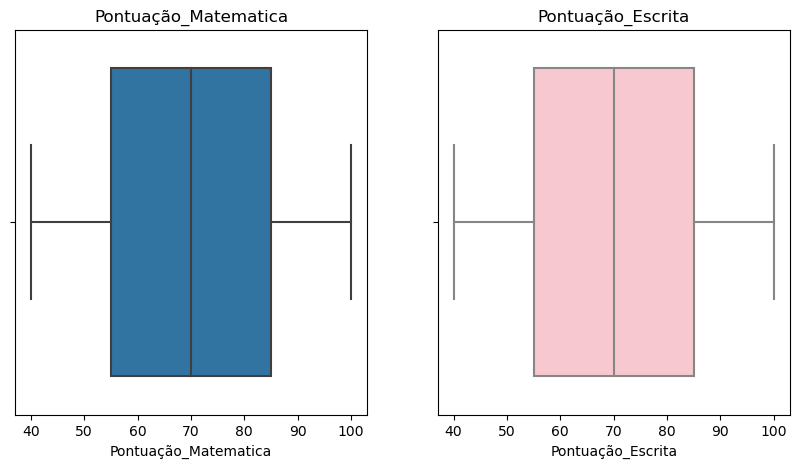

In [13]:
# Ruídos e outliers.

fig, axs = plt.subplots(ncols=2, figsize=(10,5))

sns.boxplot(x='Pontuação_Matematica', data=df, ax=axs[0])
axs[0].set_title('Pontuação_Matematica')

sns.boxplot(x='Pontuação_Escrita', data=df, color='pink', ax=axs[1])
axs[1].set_title('Pontuação_Escrita')
plt.show()

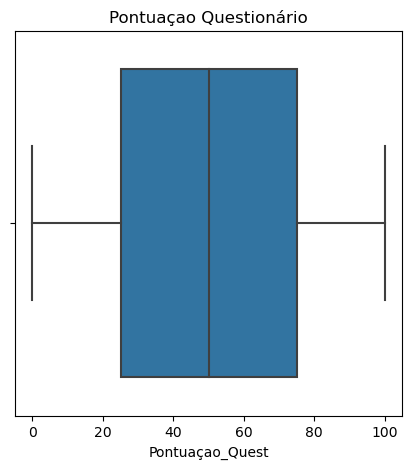

In [14]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x='Pontuaçao_Quest', data=df, ax=ax)
ax.set_title('Pontuaçao Questionário')

plt.show()

In [15]:
# Calcula o intervalo interquartil (IQR)
Q1 = df['Horas_Aulas_Visualizadas'].quantile(0.25)
Q3 = df['Horas_Aulas_Visualizadas'].quantile(0.75)
IQR = Q3 - Q1

# Identifica os outliers
outliers = df[(df['Horas_Aulas_Visualizadas'] < Q1 - 1.5 * IQR) | (df['Horas_Aulas_Visualizadas'] > Q3 + 1.5 * IQR)]

print(outliers)

Empty DataFrame
Columns: [Id, Nome, Idade, Sexo, Escolaridade, Categoria_Curso, Nome_Curso, Horas_Aulas_Visualizadas, Tarefas_Concluidas, Pontuaçao_Quest, Pausas_Aula, Retrocedeu_Aula, Acelerou_Aula, Pontuação_Matematica, Pontuação_Escrita, Pontuação_Leitura]
Index: []


Após análises inicais pode-se concluir que os dados estão com valores muito próximos, como se tivessem sido normalizados porém como é um dataset que não foi utilizado por ninguém, acho um pouco improvavél essa possibilidade.

**Análise Exploratória dos dados para avaliar o nível de engajamento dos alunos**
 
* Transformação de dados e Gerar a visualização de alguns dados agrupados.* *texto em itálico*

1. Acesso ao material do curso
2. Participação em atividades
3. Interação com o sistema de atividades
4. Desempenho acadêmico
5. Dados demográficos
6. informações do curso


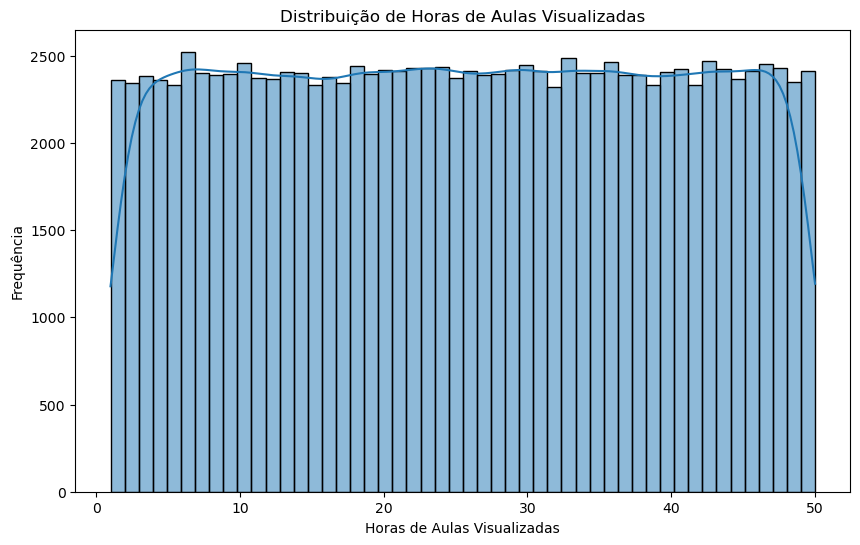

In [16]:
# Distribuição das horas aula visualizada pelos alunos

plt.figure(figsize=(10, 6))
sns.histplot(df['Horas_Aulas_Visualizadas'], kde=True)
plt.title('Distribuição de Horas de Aulas Visualizadas')
plt.xlabel('Horas de Aulas Visualizadas')
plt.ylabel('Frequência')
plt.show()

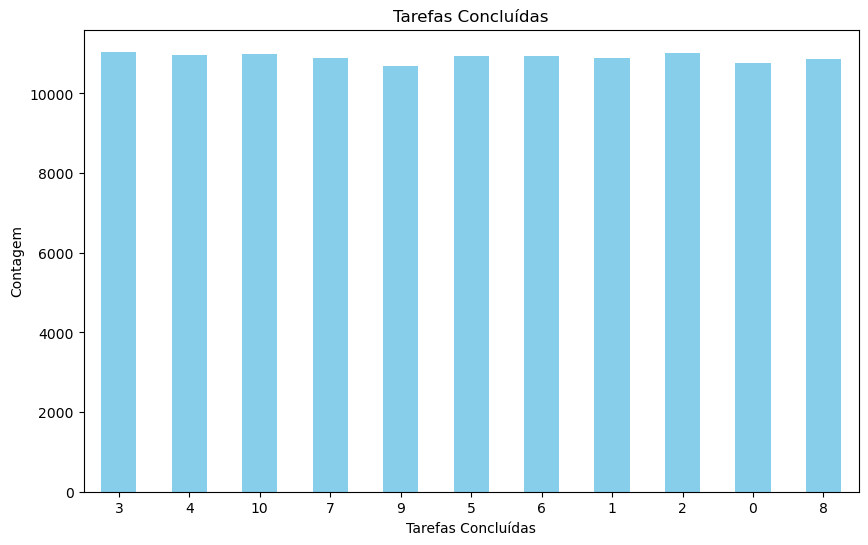

In [17]:
# Tarefas concluídas pelos alunos

valores_unicos = df['Tarefas_Concluidas'].unique()

plt.figure(figsize=(10, 6))
df['Tarefas_Concluidas'].value_counts().loc[valores_unicos].plot(kind='bar', color='skyblue')
plt.title('Tarefas Concluídas')
plt.xlabel('Tarefas Concluídas')
plt.ylabel('Contagem')
plt.xticks(rotation=0)  
plt.show()

In [18]:
df1 = df.copy()

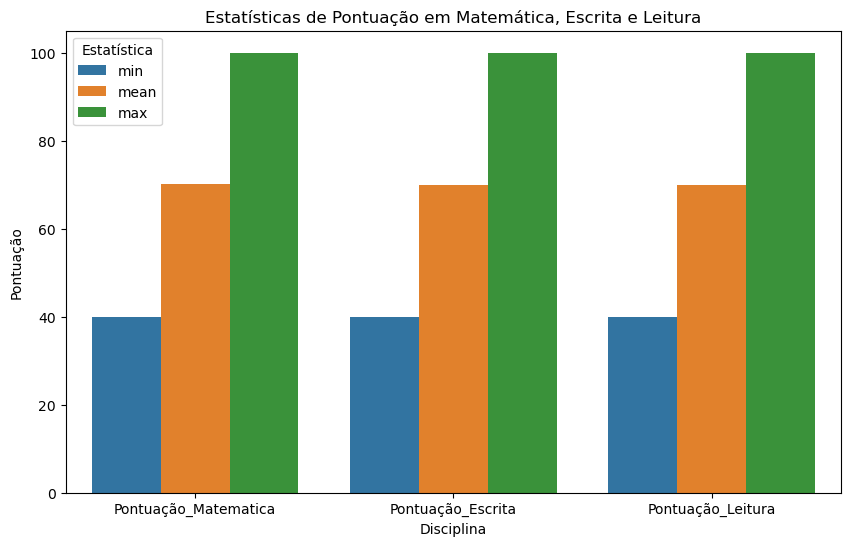

In [19]:
# Pontuação obtida pelos alunos - mínima, média e máxima

status_df1 = pd.DataFrame({
    'Pontuação_Matematica': df1['Pontuação_Matematica'].agg(['min', 'mean', 'max']),
    'Pontuação_Escrita': df1['Pontuação_Escrita'].agg(['min', 'mean', 'max']),
    'Pontuação_Leitura': df1['Pontuação_Leitura'].agg(['min', 'mean', 'max'])
}).reset_index()

# Transformando o DataFrame
melted_df = status_df1.melt(id_vars='index', value_vars=['Pontuação_Matematica', 'Pontuação_Escrita', 'Pontuação_Leitura'])
melted_df.rename(columns={'index': 'Estatística', 'variable': 'Disciplina', 'value': 'Valor'}, inplace=True)

#  gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x='Disciplina', y='Valor', hue='Estatística', data=melted_df)
plt.title('Estatísticas de Pontuação em Matemática, Escrita e Leitura')
plt.xlabel('Disciplina')
plt.ylabel('Pontuação')
plt.show()

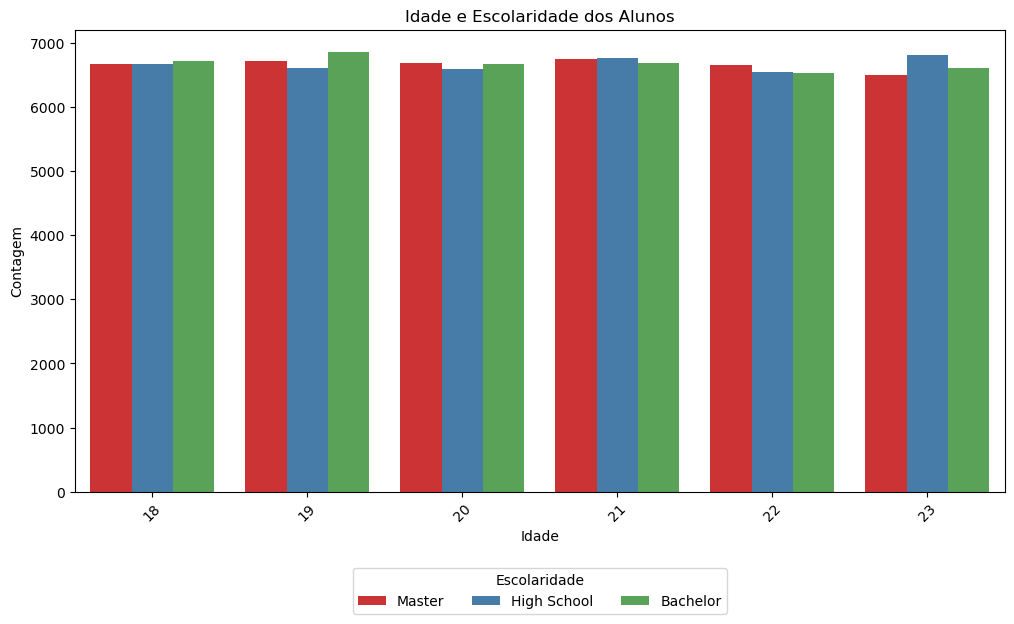

In [20]:
# Análise Demográfica

# gráfico 
plt.figure(figsize=(12, 6))
sns.countplot(x='Idade', hue='Escolaridade', data=df, palette='Set1')
plt.title('Idade e Escolaridade dos Alunos')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.legend(title='Escolaridade',loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.show()

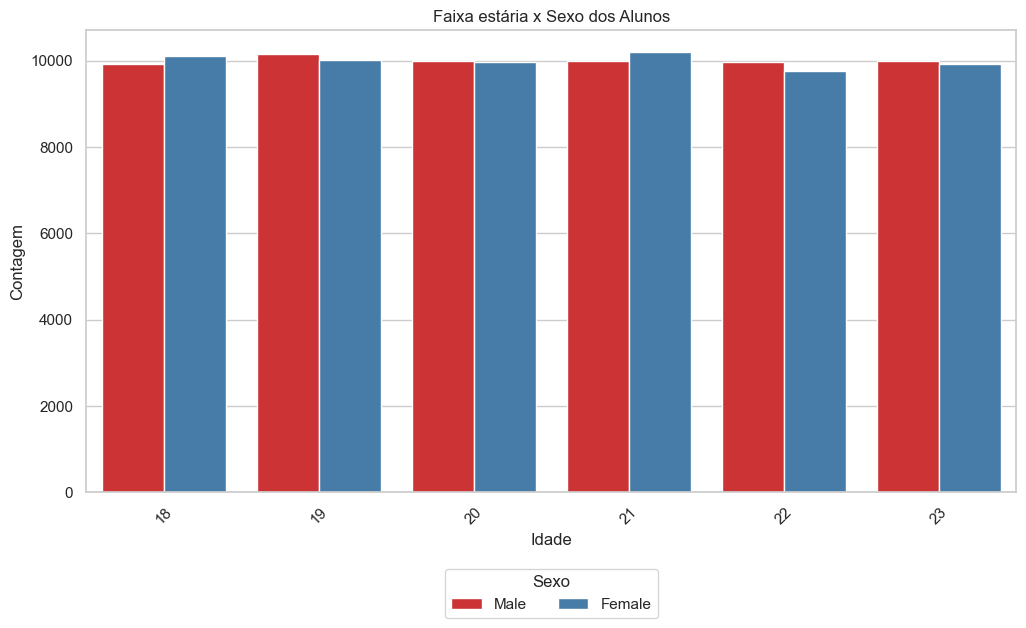

In [64]:
# Idade e Sexo dos Alunos

# gráfico 
plt.figure(figsize=(12, 6))
sns.countplot(x='Idade', hue='Sexo', data=df, palette='Set1')
plt.title('Faixa estária x Sexo dos Alunos')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.legend(title='Sexo',loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.show()

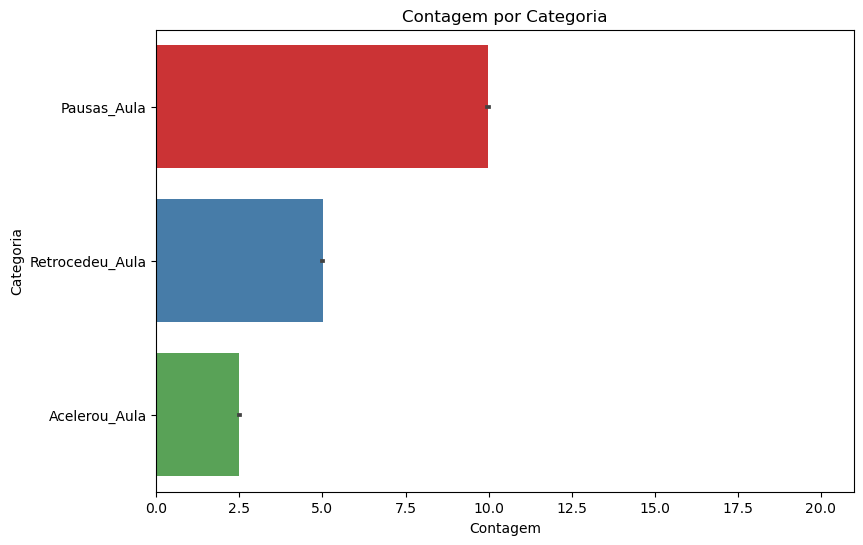

In [21]:
# Iteração com o sistema de ensino

df_melted = df.melt(value_vars=['Pausas_Aula', 'Retrocedeu_Aula', 'Acelerou_Aula'], 
                      var_name='Categoria', value_name='Contagem')

cores = ['yellow', 'pink', 'blue'] 

plt.figure(figsize=(9, 6))
sns.barplot(x='Contagem', y='Categoria', data=df_melted, palette='Set1')
plt.title('Contagem por Categoria')
plt.xlabel('Contagem')
plt.ylabel('Categoria')
plt.xlim(0, df_melted['Contagem'].max() + 1)

plt.show()

In [158]:
# Somar as colunas e calcular a média e criar uma coluna com o resultado

colunas_para_somar = ['Pausas_Aula', 'Retrocedeu_Aula', 'Acelerou_Aula']

df_iteracao_copia = df_iteracao.copy()

df_iteracao_copia['Soma'] = df_iteracao_copia[colunas_para_somar].sum(axis=1)
df_iteracao_copia['Media'] = df_iteracao_copia[colunas_para_somar].mean(axis=1)

print(df_iteracao_copia)

        Idade Categoria_Curso  Pausas_Aula  Retrocedeu_Aula  Acelerou_Aula  \
0          18  advance_skills           15                4              1   
1          23         reading           18                3              2   
2          23  advance_skills           12                6              4   
3          19  advance_skills           12                1              1   
4          23  advance_skills           15                7              0   
...       ...             ...          ...              ...            ...   
119995     20         reading           12                2              3   
119996     21  advance_skills           20                2              5   
119997     19           maths           11                2              0   
119998     19         reading            7                4              3   
119999     18         reading           18                9              0   

        Soma     Media  
0         20  6.666667  
1         23 

In [159]:
# Iteraçãoa com o Sistema por curso

df_iteracao = df1[['Idade', 'Categoria_Curso', 'Pausas_Aula', 'Retrocedeu_Aula', 'Acelerou_Aula']]
df_iteracao

,Idade,Categoria_Curso,Pausas_Aula,Retrocedeu_Aula,Acelerou_Aula
0,18,advance_skills,15,4,1
1,23,reading,18,3,2
2,23,advance_skills,12,6,4
3,19,advance_skills,12,1,1
4,23,advance_skills,15,7,0
...,...,...,...,...,...
119995,20,reading,12,2,3
119996,21,advance_skills,20,2,5
119997,19,maths,11,2,0
119998,19,reading,7,4,3


In [169]:
df1_calc = df1[[ 'Horas_Aulas_Visualizadas', 'Tarefas_Concluidas', 'Pontuaçao_Quest', 'Pausas_Aula', 'Retrocedeu_Aula', 'Acelerou_Aula',
       'Pontuação_Matematica', 'Pontuação_Escrita', 'Pontuação_Leitura']]
df1_calc

,Horas_Aulas_Visualizadas,Tarefas_Concluidas,Pontuaçao_Quest,Pausas_Aula,Retrocedeu_Aula,Acelerou_Aula,Pontuação_Matematica,Pontuação_Escrita,Pontuação_Leitura
0,9.18,3,39,15,4,1,55,95,75
1,22.19,4,68,18,3,2,52,52,48
2,45.72,10,18,12,6,4,66,68,41
3,2.74,7,14,12,1,1,74,71,79
4,10.16,4,39,15,7,0,58,51,41
...,...,...,...,...,...,...,...,...,...
119995,45.34,3,4,12,2,3,69,54,72
119996,41.71,3,21,20,2,5,92,72,89
119997,34.08,10,28,11,2,0,68,54,49
119998,13.27,8,92,7,4,3,58,88,75


In [177]:
# Calcula a média, mínimo e máximo para cada categoria de curso

result = df1.groupby('Categoria_Curso').agg({
    'Pausas_Aula': ['mean', 'min', 'max'],
    'Retrocedeu_Aula': ['mean', 'min', 'max'],
    'Acelerou_Aula': ['mean', 'min', 'max']
}).reset_index()

# Renomeia as colunas para maior clareza
result.columns = ['Categoria_Curso', 
                  'Pausas_Aula_Media', 'Pausas_Aula_Minimo', 'Pausas_Aula_Maximo',
                  'Retrocedeu_Aula_Media', 'Retrocedeu_Aula_Minimo', 'Retrocedeu_Aula_Maximo',
                  'Acelerou_Aula_Media', 'Acelerou_Aula_Minimo', 'Acelerou_Aula_Maximo']

# Exibe o DataFrame resultante
print(result)


  Categoria_Curso  Pausas_Aula_Media  Pausas_Aula_Minimo  Pausas_Aula_Maximo  \
0  advance_skills           9.963403                   0                  20   
1           maths           9.961912                   0                  20   
2         reading           9.998064                   0                  20   
3         writing          10.040803                   0                  20   

   Retrocedeu_Aula_Media  Retrocedeu_Aula_Minimo  Retrocedeu_Aula_Maximo  \
0               4.990727                       0                      10   
1               4.954400                       0                      10   
2               5.052261                       0                      10   
3               5.041206                       0                      10   

   Acelerou_Aula_Media  Acelerou_Aula_Minimo  Acelerou_Aula_Maximo  
0             2.507452                     0                     5  
1             2.504620                     0                     5  
2          

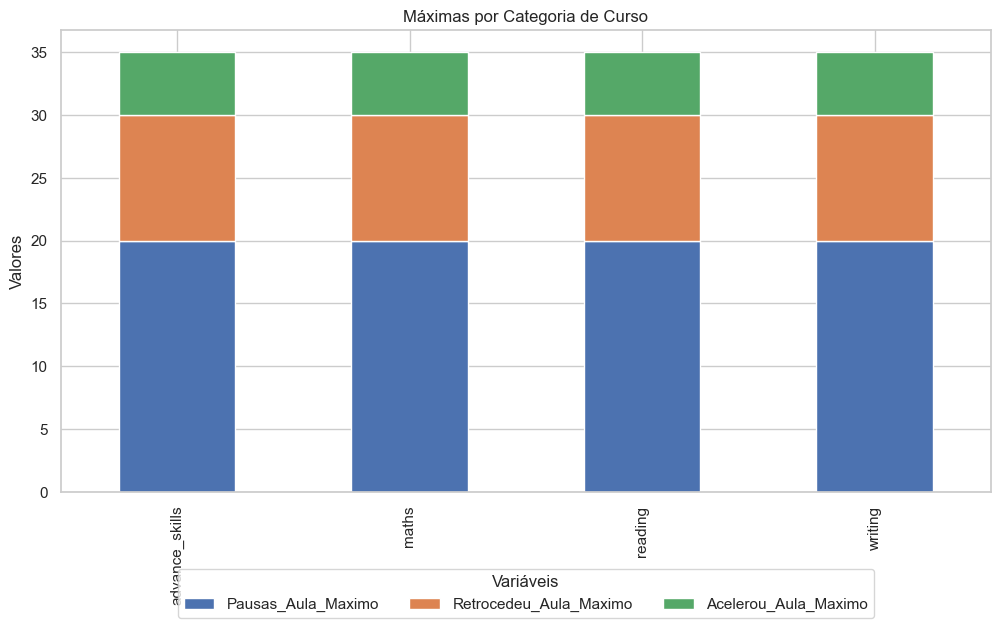

In [178]:
# Criando o gráfico de barras

result.set_index('Categoria_Curso', inplace=True)

ax = result[['Pausas_Aula_Maximo', 'Retrocedeu_Aula_Maximo', 'Acelerou_Aula_Maximo']].plot(kind='bar', stacked=True, figsize=(12, 6))

plt.xlabel('')
plt.ylabel('Valores')
plt.title('Máximas por Categoria de Curso')

plt.legend(title='Variáveis',loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.show()

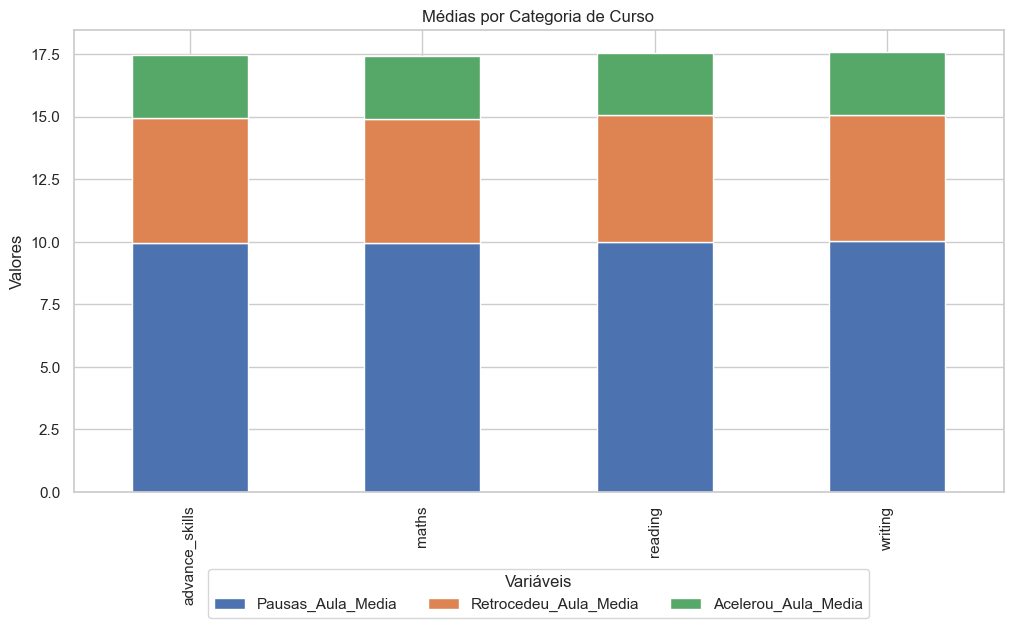

In [84]:
# Gráfico

result.set_index('Categoria_Curso', inplace=True)

ax = result[['Pausas_Aula_Media', 'Retrocedeu_Aula_Media', 'Acelerou_Aula_Media']].plot(kind='bar', stacked=True, figsize=(12, 6))

plt.xlabel('')
plt.ylabel('Valores')
plt.title('Médias por Categoria de Curso')

plt.legend(title='Variáveis',loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.show()

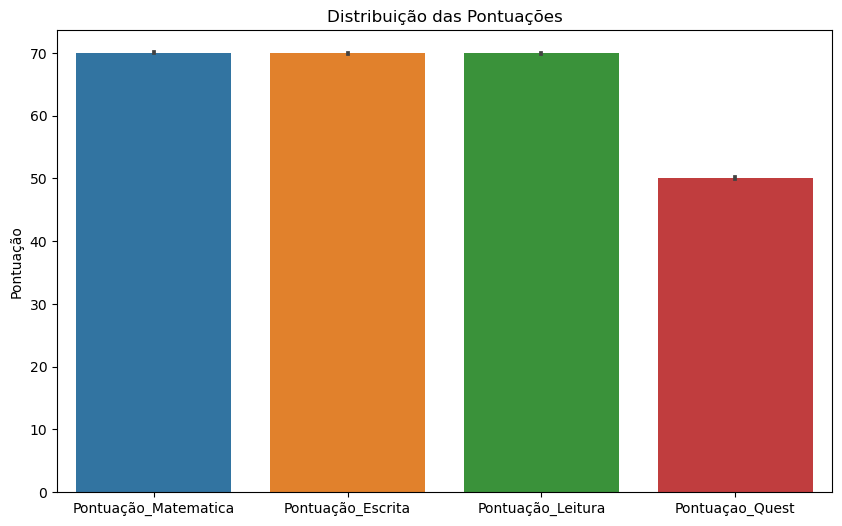

In [22]:
# Desempenho Academico

plt.figure(figsize=(10, 6))
sns.barplot(data=df[['Pontuação_Matematica', 'Pontuação_Escrita', 'Pontuação_Leitura','Pontuaçao_Quest']])
plt.title('Distribuição das Pontuações')
plt.ylabel('Pontuação')
plt.show()

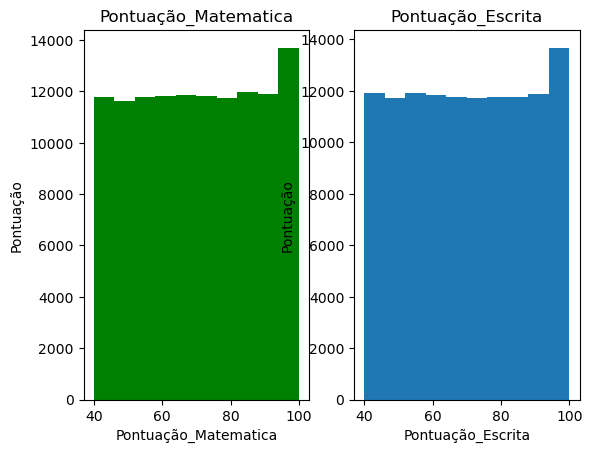

In [23]:
# Primeiro gráfico
plt.subplot(1, 2, 1)
plt.hist(df.Pontuação_Matematica, color='green')
plt.xlabel('Pontuação_Matematica')
plt.ylabel('Pontuação')
plt.title('Pontuação_Matematica')


# Segundo gráfico
plt.subplot(1, 2, 2)
plt.hist(df.Pontuação_Escrita)
plt.xlabel('Pontuação_Escrita')
plt.ylabel('Pontuação')
plt.title('Pontuação_Escrita')

plt.show()

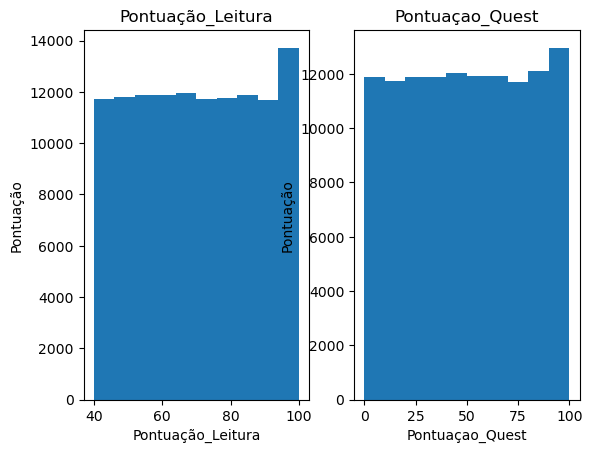

In [24]:
# Terceiro gráfico

plt.subplot(1, 2, 1)
plt.hist(df.Pontuação_Leitura)
plt.xlabel('Pontuação_Leitura')
plt.ylabel('Pontuação')
plt.title('Pontuação_Leitura')

# Quarto gráfico
plt.subplot(1, 2, 2)
plt.hist(df.Pontuaçao_Quest)
plt.xlabel('Pontuaçao_Quest')
plt.ylabel('Pontuação')
plt.title('Pontuaçao_Quest')

plt.show()

In [85]:
# Calcula a média, mínimo e máximo para cada categoria de curso

result_Pontos = df1.groupby('Categoria_Curso').agg({
    'Pontuação_Escrita': ['mean', 'min', 'max'],
    'Pontuação_Leitura': ['mean', 'min', 'max'],
    'Pontuaçao_Quest': ['mean', 'min', 'max'],
    'Pontuação_Matematica': ['mean', 'min', 'max']
}).reset_index()

# Renomeia as colunas para maior clareza
result_Pontos.columns = ['Categoria_Curso', 
                  'Escrita_Media', 'Escrita_Minimo', 'Escrita_Maximo',
                  'Leitura_Media', 'Leitura_Minimo', 'Leitura_Maximo',
                  'Quest_Media', 'Quest_Minimo', 'Quest_Maximo',
                  'Matematica_Media', 'Matematicaa_Minimo', 'Matematica_Maximo']

# Exibe o DataFrame resultante
print(result_Pontos)


  Categoria_Curso  Escrita_Media  Escrita_Minimo  Escrita_Maximo  \
0  advance_skills      70.003577              40             100   
1           maths      70.032172              40             100   
2         reading      69.911363              40             100   
3         writing      69.867845              40             100   

   Leitura_Media  Leitura_Minimo  Leitura_Maximo  Quest_Media  Quest_Minimo  \
0      70.035173              40             100    49.996191             0   
1      69.898265              40             100    49.781308             0   
2      70.008910              40             100    50.067646             0   
3      69.965382              40             100    50.269990             0   

   Quest_Maximo  Matematica_Media  Matematicaa_Minimo  Matematica_Maximo  
0           100         70.070411                  40                100  
1           100         70.062949                  40                100  
2           100         70.027132     

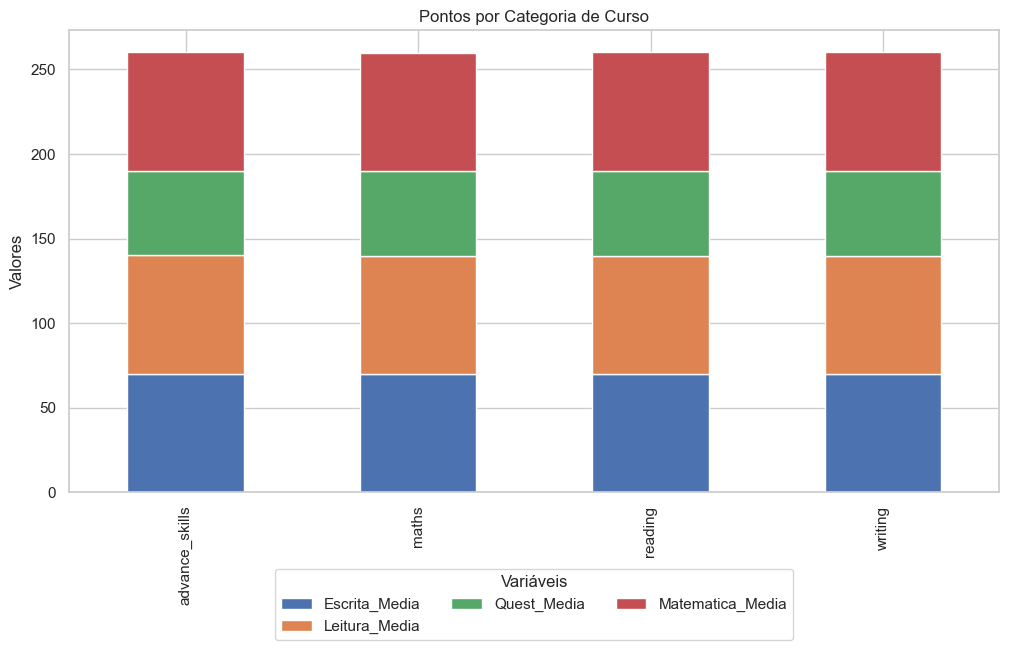

In [86]:
# Gráfico

result_Pontos.set_index('Categoria_Curso', inplace=True)

ax = result_Pontos[['Escrita_Media', 'Leitura_Media', 'Quest_Media', 'Matematica_Media']].plot(kind='bar', stacked=True, figsize=(12, 6))

plt.xlabel('')
plt.ylabel('Valores')
plt.title('Pontos por Categoria de Curso')

plt.legend(title='Variáveis',loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.show()

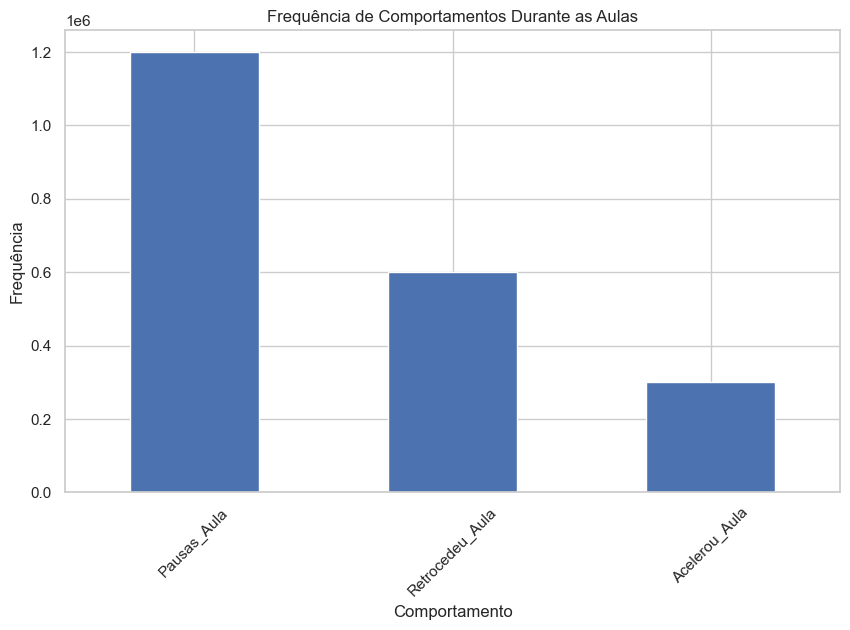

In [165]:
# Comportamento dos alunos durante as aulas

# Gráfico de barras para Pausas_Aula, Retrocedeu_Aula, Acelerou_Aula

plt.figure(figsize=(10, 6))
df1[['Pausas_Aula', 'Retrocedeu_Aula', 'Acelerou_Aula']].sum().plot(kind='bar')
plt.title('Frequência de Comportamentos Durante as Aulas')
plt.xlabel('Comportamento')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()


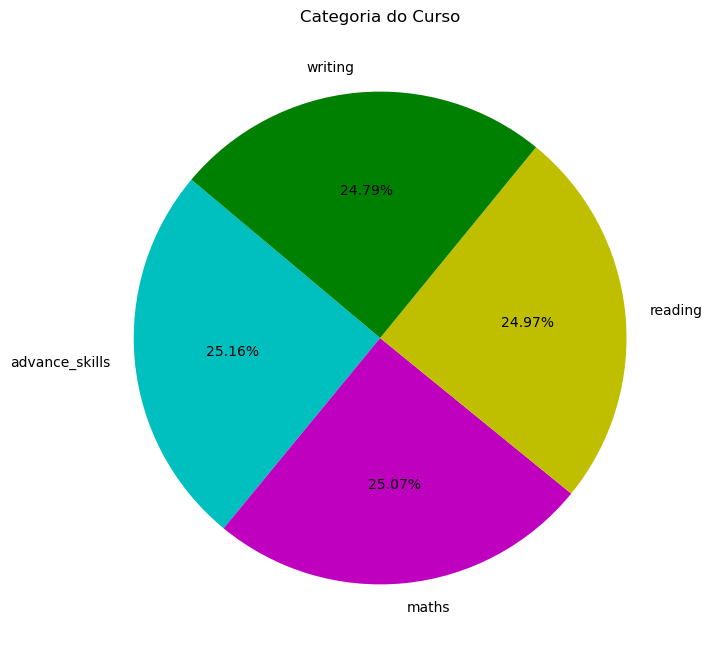

In [25]:
categorias = df['Categoria_Curso'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(categorias, labels=categorias.index, colors=['c', 'm', 'y', 'g'], autopct='%1.2f%%', startangle=140)
plt.title('Categoria do Curso')
plt.show()

In [40]:
df_pontuacao = df1[['Escolaridade', 'Pontuaçao_Quest', 'Pontuação_Matematica', 'Pontuação_Escrita', 'Pontuação_Leitura']]
df_pontuacao

,Escolaridade,Pontuaçao_Quest,Pontuação_Matematica,Pontuação_Escrita,Pontuação_Leitura
0,Master,39,55,95,75
1,Master,68,52,52,48
2,Master,18,66,68,41
3,High School,14,74,71,79
4,High School,39,58,51,41
...,...,...,...,...,...
119995,Bachelor,4,69,54,72
119996,High School,21,92,72,89
119997,Master,28,68,54,49
119998,Master,92,58,88,75


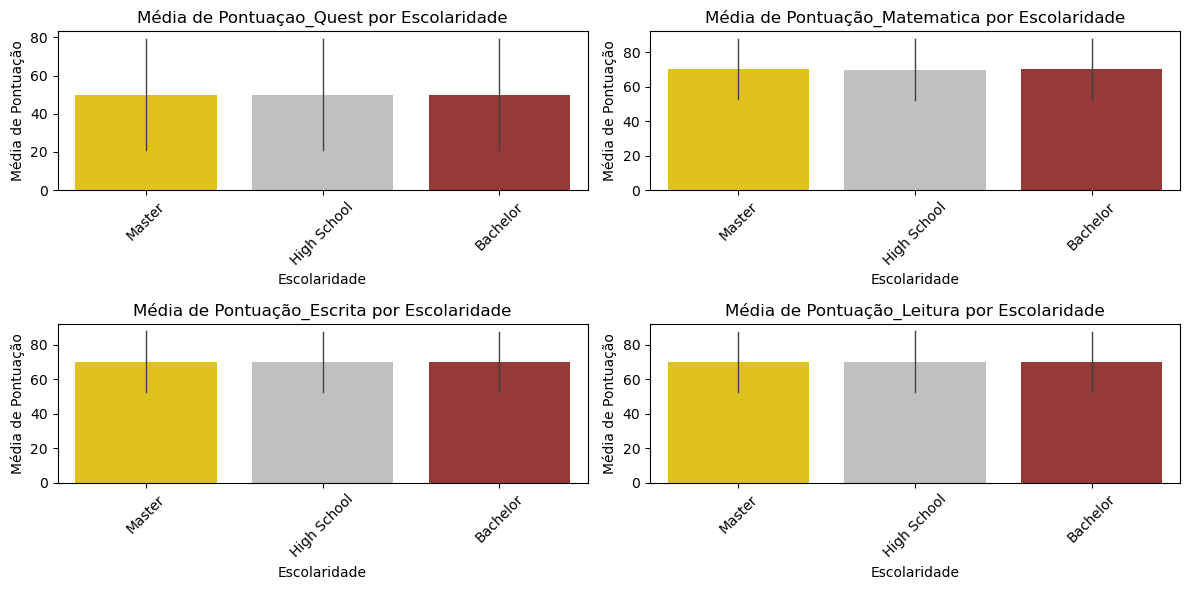

In [51]:

cores = ['gold', 'silver', 'brown']


plt.figure(figsize=(12, 6))

colunas_pontuacao = ['Pontuaçao_Quest', 'Pontuação_Matematica', 'Pontuação_Escrita', 'Pontuação_Leitura']

for i, coluna in enumerate(colunas_pontuacao, start=1):
    plt.subplot(2, 2, i)
    sns.barplot(data=df_pontuacao, x='Escolaridade', y=coluna, palette=cores, errorbar='sd', errwidth=1)
    plt.title(f'Média de {coluna} por Escolaridade')
    plt.xlabel('Escolaridade')
    plt.ylabel('Média de Pontuação')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


As médias também estão com valores bem próximos, o único que diverge dos demais é Pontuação Quest.


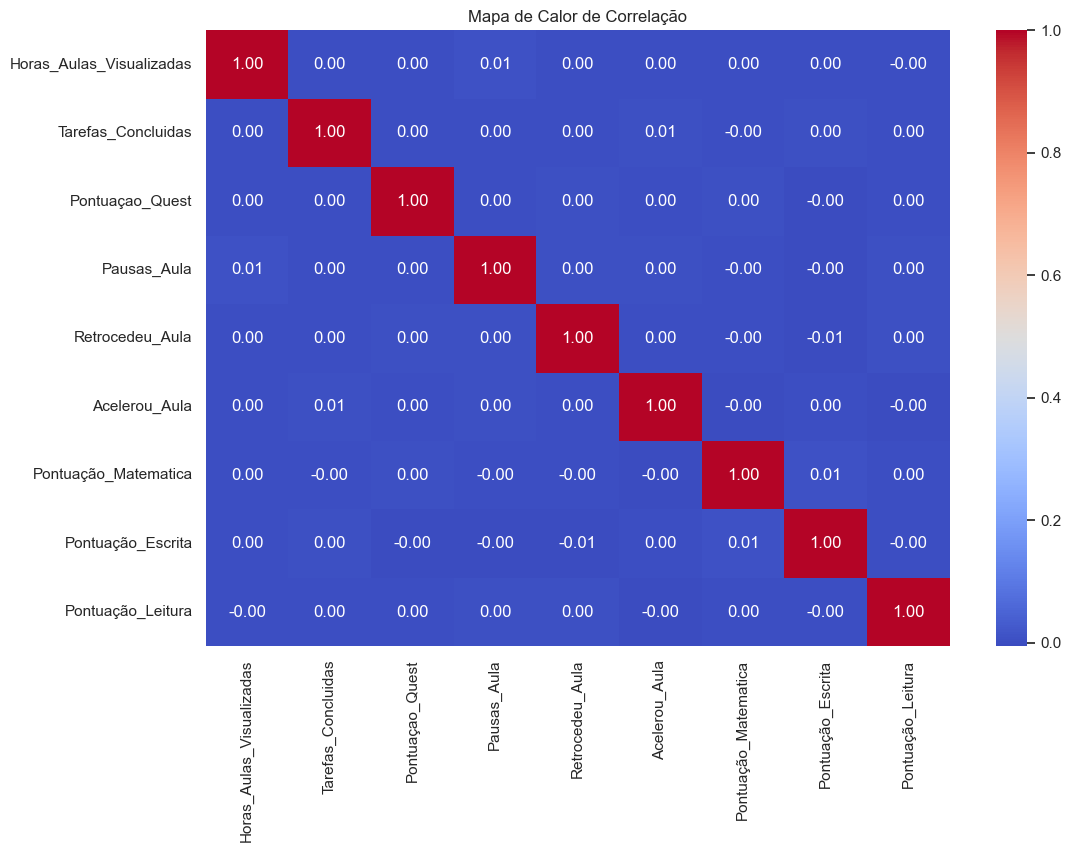

In [179]:
# Gráfico de Correlação entre Aulas Visualizadas e Pontuação no Questionário

# Calculando a matriz de correlação
corr = df1_calc.corr(method='pearson')

# Criando o mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de Correlação')
plt.show()

* Este heatmap tem por objetivo mostrar de forma visual a intensidade da relação entre as variáveis que representam p nível de engajamento e de aprendizado dos alunos por curso. As cores mais próximas do vermelho indicam maior relação entre as variáveis e as cores mais próximas do azul indicam uma relação mais distante entra elas - valores mais baixos.
 *O Mapa de calor serviu para mostrar que não há uma relação linear significativa entre as variáveis correspondentes.

In [90]:
df_media_pontuacoes = df1.groupby('Nome_Curso')[['Pontuaçao_Quest', 'Pontuação_Matematica', 'Pontuação_Escrita', 'Pontuação_Leitura']].mean().reset_index()
df_media_pontuacoes


,Nome_Curso,Pontuaçao_Quest,Pontuação_Matematica,Pontuação_Escrita,Pontuação_Leitura
0,Algebra,49.685626,70.016037,69.944616,69.885746
1,Calculus,50.058620,70.193723,69.932004,69.885128
2,Comprehension Skills,50.191908,70.142158,70.146753,70.153347
3,Creative Writing,50.489439,70.068339,69.992486,69.983652
4,Critical Thinking,50.114461,70.185332,70.231689,70.003460
5,Essay Composition,50.120600,69.976500,69.759300,69.873400
6,Geometry,49.594796,69.976805,70.223175,69.924365
7,Grammar,50.202625,70.000707,69.853508,70.040081
8,Literary Analysis,50.002817,70.096086,69.802395,69.962974
9,Poetry,50.007788,69.843750,69.784245,69.910144


In [62]:
# Arredondando os  valores da médias em 2 casas decimais

df_media_pontuacoes = df_media_pontuacoes.round({'Pontuaçao_Quest': 2, 'Pontuação_Matematica': 2,'Pontuação_Escrita': 2, 'Pontuação_Leitura': 2})
df_media_pontuacoes

,Nome_Curso,Pontuaçao_Quest,Pontuação_Matematica,Pontuação_Escrita,Pontuação_Leitura
0,Algebra,49.69,70.02,69.94,69.89
1,Calculus,50.06,70.19,69.93,69.89
2,Comprehension Skills,50.19,70.14,70.15,70.15
3,Creative Writing,50.49,70.07,69.99,69.98
4,Critical Thinking,50.11,70.19,70.23,70.00
5,Essay Composition,50.12,69.98,69.76,69.87
6,Geometry,49.59,69.98,70.22,69.92
7,Grammar,50.20,70.00,69.85,70.04
8,Literary Analysis,50.00,70.10,69.80,69.96
9,Poetry,50.01,69.84,69.78,69.91


In [101]:
# Cálculo de regressão linear

!pip install scipy statsmodels
!pip show scipy statsmodels

import scipy.stats as stats
import statsmodels.api as sm

     ---------------------------------------- 0.0/9.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.4 MB 325.1 kB/s eta 0:00:29
     ---------------------------------------- 0.1/9.4 MB 363.1 kB/s eta 0:00:26
     ---------------------------------------- 0.1/9.4 MB 544.7 kB/s eta 0:00:17
     - -------------------------------------- 0.4/9.4 MB 1.5 MB/s eta 0:00:06
     ---- ----------------------------------- 1.2/9.4 MB 3.9 MB/s eta 0:00:03
     --------- ------------------------------ 2.1/9.4 MB 5.8 MB/s eta 0:00:02
     ------------ --------------------------- 2.8/9.4 MB 6.9 MB/s eta 0:00:01
     ---------------- ----------------------- 3.8/9.4 MB 8.3 MB/s eta 0:00:01
     -------------------- ------------------- 4.9/9.4 MB 9.8 MB/s eta 0:00:01
     ------------------------- -------------- 6.0/9.4 MB 10.7 MB/s eta 0:00:01


In [138]:
df_pontuacao = df1[['Escolaridade', 'Pontuaçao_Quest', 'Pontuação_Matematica', 'Pontuação_Escrita', 'Pontuação_Leitura']]
df_pontuacao

,Escolaridade,Pontuaçao_Quest,Pontuação_Matematica,Pontuação_Escrita,Pontuação_Leitura
0,Master,39,55,95,75
1,Master,68,52,52,48
2,Master,18,66,68,41
3,High School,14,74,71,79
4,High School,39,58,51,41
...,...,...,...,...,...
119995,Bachelor,4,69,54,72
119996,High School,21,92,72,89
119997,Master,28,68,54,49
119998,Master,92,58,88,75


In [139]:
# Alterando a coluna Escolaridade

df_pontuacao_copia = df_pontuacao.copy()

mapeamento_escolaridade = {
    'High School': 1,
    'Bachelor': 2,
    'Master': 3
}

df_pontuacao_copia['Escolaridade'] = df_pontuacao_copia['Escolaridade'].map(mapeamento_escolaridade)

print(df_pontuacao_copia['Escolaridade'].unique())

[3 1 2]


In [140]:


# Variável de destino
y = df_pontuacao_copia['Escolaridade']

# Variáveis independentes (features)
X = df_pontuacao_copia[['Pontuaçao_Quest', 'Pontuação_Matematica', 'Pontuação_Escrita','Pontuação_Leitura']]

# Adicione uma constante para o termo de interceptação (bias)
X = sm.add_constant(X)

# Crie o modelo de regressão
modelo = sm.OLS(y, X).fit()

# Examine os resultados da regressão
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:           Escolaridade   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.475
Date:                Mon, 13 Nov 2023   Prob (F-statistic):              0.207
Time:                        22:45:31   Log-Likelihood:            -1.4589e+05
No. Observations:              120000   AIC:                         2.918e+05
Df Residuals:                  119995   BIC:                         2.918e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.9811 

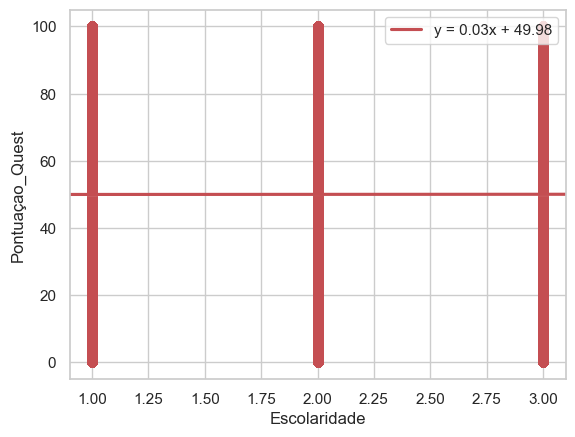

In [141]:
# Relação entre idade e médias de pontuação

y = df_pontuacao_copia['Pontuaçao_Quest']

X = sm.add_constant(df_pontuacao_copia['Escolaridade'])

modelo = sm.OLS(y, X).fit()

slope = modelo.params['Escolaridade']
intercept = modelo.params['const']

sns.regplot(x='Escolaridade',
            y='Pontuaçao_Quest',
            data=df_pontuacao_copia,
            color='r',
            truncate=False,
            ci=95,
            line_kws={'label': "y = {0:.2f}x + {1:.2f}".format(slope, intercept)})

plt.legend()

plt.show()

In [161]:

print(df_iteracao_copia.columns)

Index(['Idade', 'Categoria_Curso', 'Pausas_Aula', 'Retrocedeu_Aula',
       'Acelerou_Aula', 'Soma', 'Media'],
      dtype='object')


In [162]:
modelo_reglin = stats.linregress(df_iteracao_copia['Idade'], df_iteracao_copia['Soma'])

slope, intercept, r_value, p_value, std_err = stats.linregress(df_iteracao_copia['Idade'], df_iteracao_copia['Soma'])

print("y = %.2fx + %.2f" % (slope, intercept))

# df_iteracao_copia.colums


y = -0.00x + 5.93


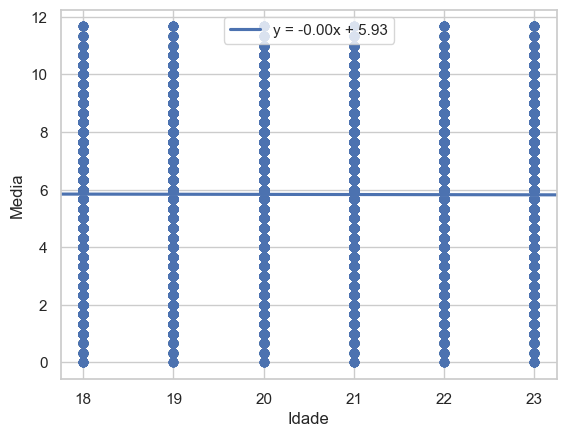

In [163]:
 # Gerar gráfico da regressão linear do modelo reglin
    
sns.regplot(x='Idade',
 y='Media',
 data=df_iteracao_copia,
 color='b',
 truncate=False,
 ci=95,
 line_kws={'label': 'y = {0:.2f}x + {1:.2f}'.format(slope, intercept)}).legend()

** Conclusão**

1. Os dados estão quase todos normalizados, tanto em relação ao sexo dos estudantes, como o percentual de alunos em cada curso
2. A média de pontuação dos alunos está bem nivelada na pontuação de leitura, matemática e escrita. A única mais baixa é a pontuação quest, e mesmo dentro dela os valores são bem uniformes
3 . A regresão Linear indicaque que  o R² é 0, o que significa que o modelo não consegue explicar muito da variabilidade na variável dependente "Escolaridade". Ela também mostra que  as variáveis independentes incluídas no modelo não são estatisticamente significativas para prever a variável dependente.
4. Duas formas de fazer a regressão linear deram o mesmo resultado.
